# Very naive learning on the vector of surrounding bases with standardish machine learning algorithms from scikit sklearn

---

### Data

Naive feature vectors. The original sequence of validation/test and train data does not overlap! ( but train data points can overlap with train data points, and test-validation can overlap with test-validation data ) This overlapping does not lead to unintentional label leakage!

### Analysis

- position importance figures with Random Forest.

### Conlcusions

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

from sklearn import ensemble

import sys
sys.path.append('../my_modules')
from loading_utils import read_my_data

import os,subprocess
workdir='/nagyvinyok/adat84/sotejedlik/ribli/methylation_code/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

### Load data

In [7]:
train_id,train_x,train_y = read_my_data(fname='../prepare_data/big_train_feat_vect.csv')
test_id,test_x,test_y = read_my_data(fname='../prepare_data/big_test_feat_vect.csv')

Loading data... 
Loading data... 


### Exclude data with not CG on the position

In [56]:
cg_exl_idx=np.array([x[499]==2 and x[500]==3 for x in train_x])

---
## Feature importance with Random Forest


In [54]:
def plot_feat_imp(train_x,train_y,**kwargs):
    
    rf = ensemble.RandomForestClassifier(**kwargs)
    model=rf.fit(train_x,train_y)
    
    feature_importance = model.feature_importances_

    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    fig,ax=plt.subplots()
    fig.set_size_inches(12,9)
    ax.step(np.arange(len(feature_importance))-500, feature_importance,lw=1,c='dodgerblue')
    ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='CpG position')
    ax.set_ylabel('realtive importance',fontsize=16)
    ax.set_xlabel('pos',fontsize=16)
    ax.set_xlim(-500,500)
    ax.legend(fontsize=16)
    dump=ax.set_title('position importance',fontsize=16)

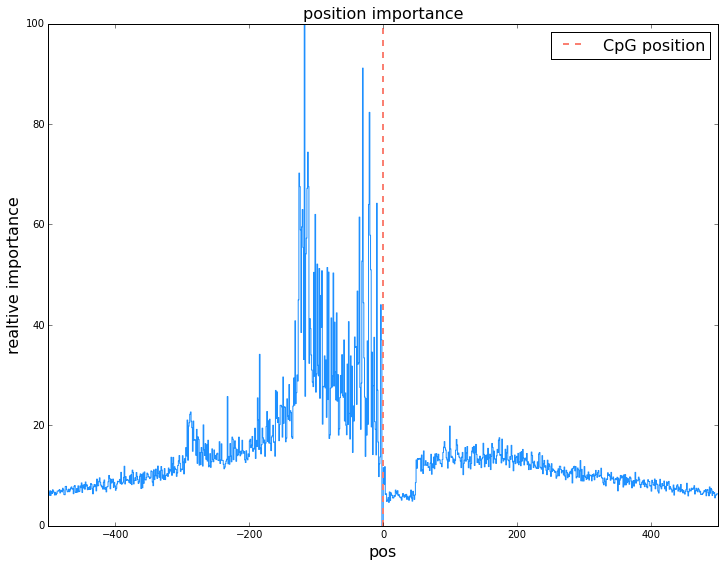

In [77]:
idx=cg_exl_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=200,min_samples_split=100,n_jobs=14)

## Check pos importance among annotation groups

In [20]:
annot=pd.read_csv('../explore_data/relevant_annotations.csv',sep='\t',header=None)
annot.columns=['id','Regulatory_Feature_Group','Relation_to_UCSC_CpG_Island',
    'Strand','Infinium_Design_Type','Random_Loci','Methyl27_Loci']
annot.fillna(0,inplace=True)
annot.head()

,id,Regulatory_Feature_Group,Relation_to_UCSC_CpG_Island,Strand,Infinium_Design_Type,Random_Loci,Methyl27_Loci
0,cg00035864,0,0,F,II,0,0
1,cg00050873,0,N_Shore,R,I,0,0
2,cg00061679,0,0,R,II,0,0
3,cg00063477,0,S_Shelf,F,II,0,0
4,cg00121626,0,N_Shore,R,II,0,0


In [21]:
merged=pd.DataFrame(train_id,columns=['id']).merge(annot,on=['id'])

----

## CpG island annotation

### Islands

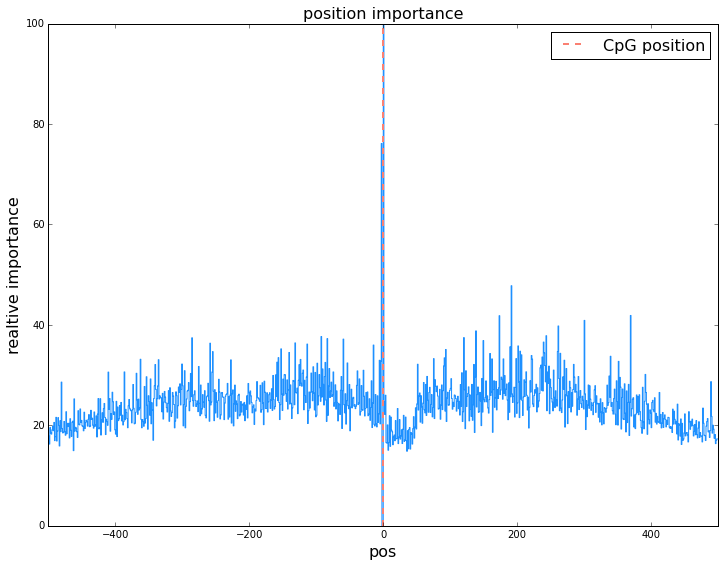

In [101]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island=='Island'].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

### Shores

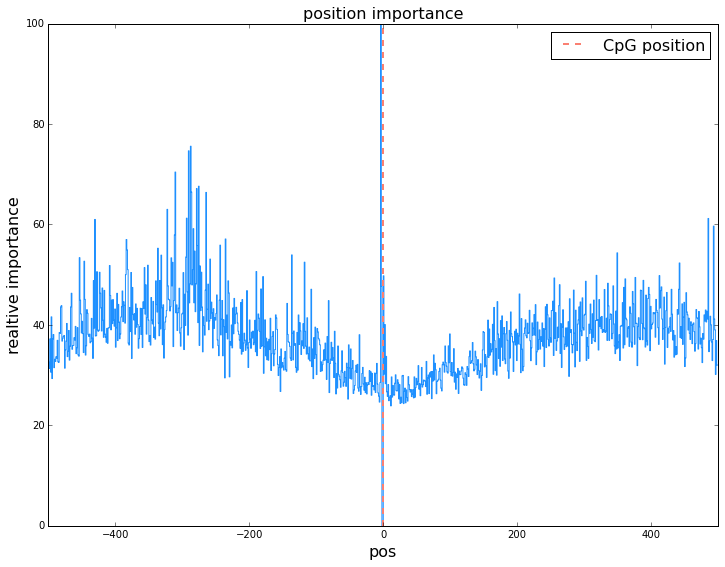

In [100]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shore' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shore' )].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

### Shelves

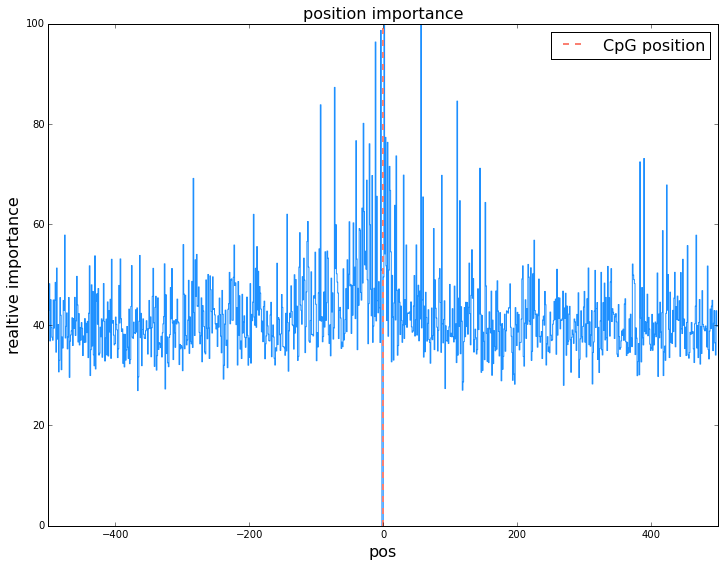

In [99]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shelf' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shelf' )].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

### No annotation

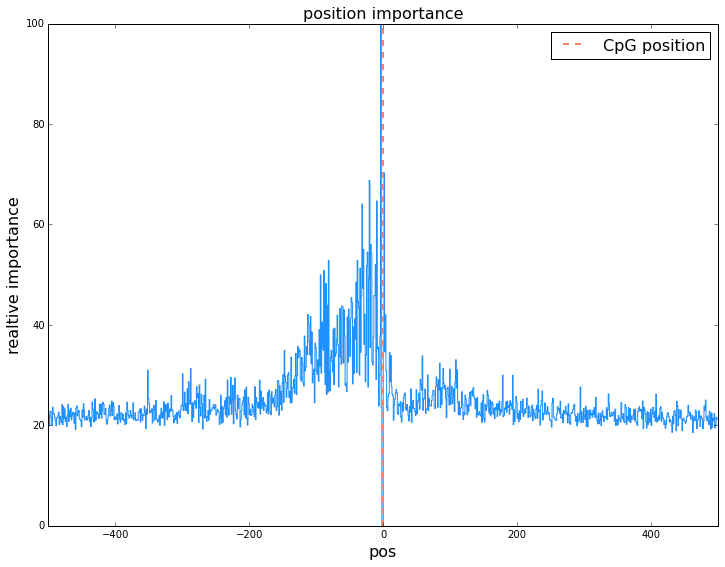

In [98]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island==0].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

### Shore of shelf ?

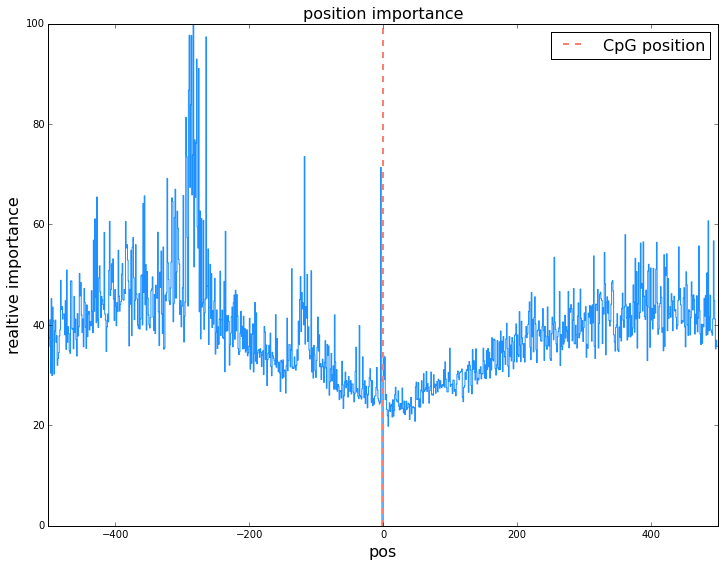

In [96]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island!='Island' ) &
           (merged.Relation_to_UCSC_CpG_Island!=0)].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

### Shore or Island

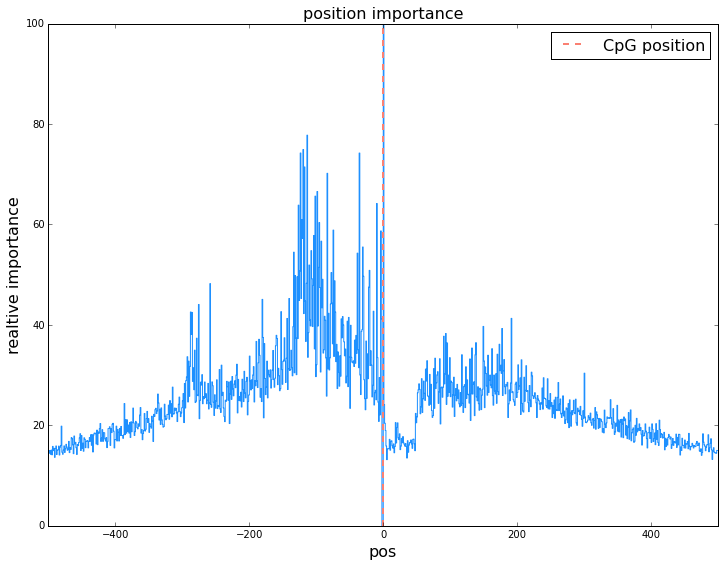

In [110]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island!='S_Shelf' ) &
                 (merged.Relation_to_UCSC_CpG_Island!='N_Shelf' ) &
               (merged.Relation_to_UCSC_CpG_Island!=0)].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

----

## Promoter annotation

### Not promoter

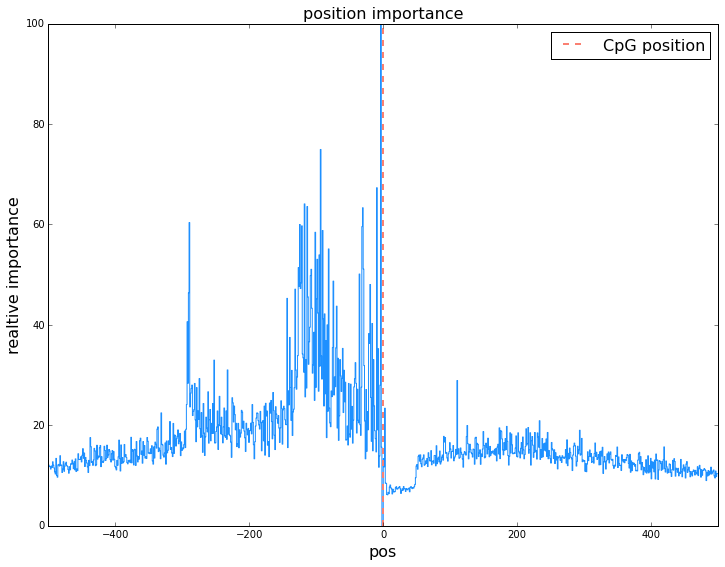

In [102]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Regulatory_Feature_Group==0].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

### Promoter

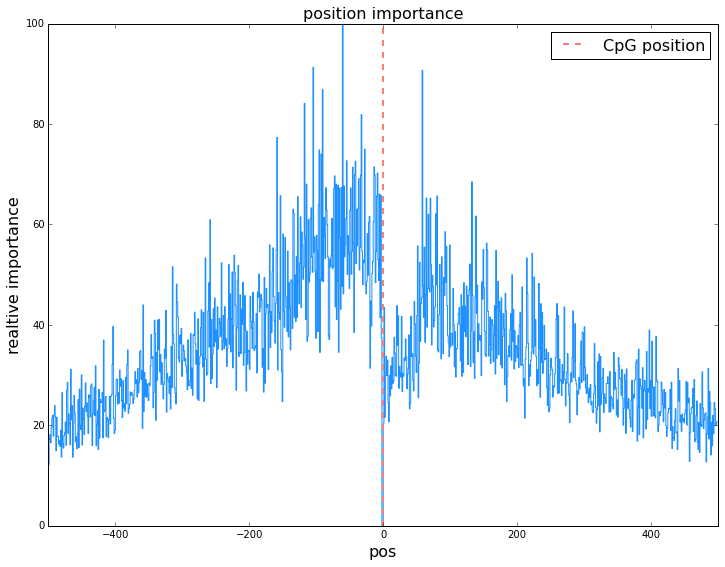

In [103]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Regulatory_Feature_Group=='Promoter_Associated'].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

## Mixing annotation

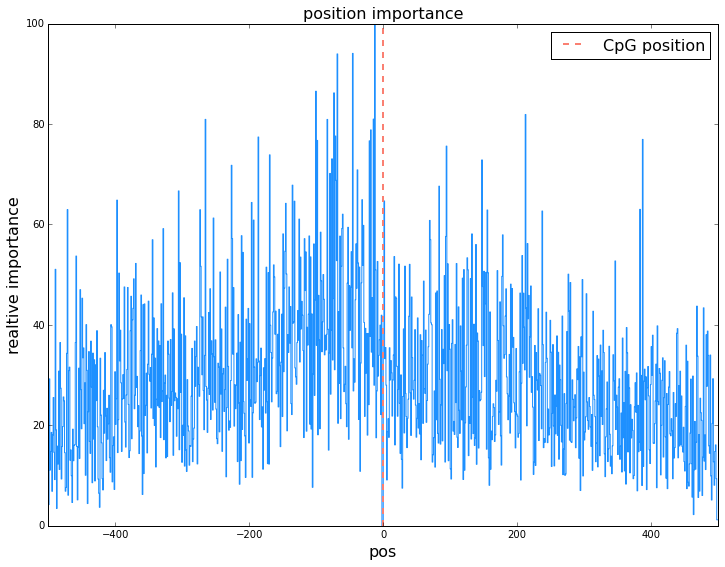

In [104]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Regulatory_Feature_Group=='Promoter_Associated')&
                (merged.Relation_to_UCSC_CpG_Island=='Island' ) ].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

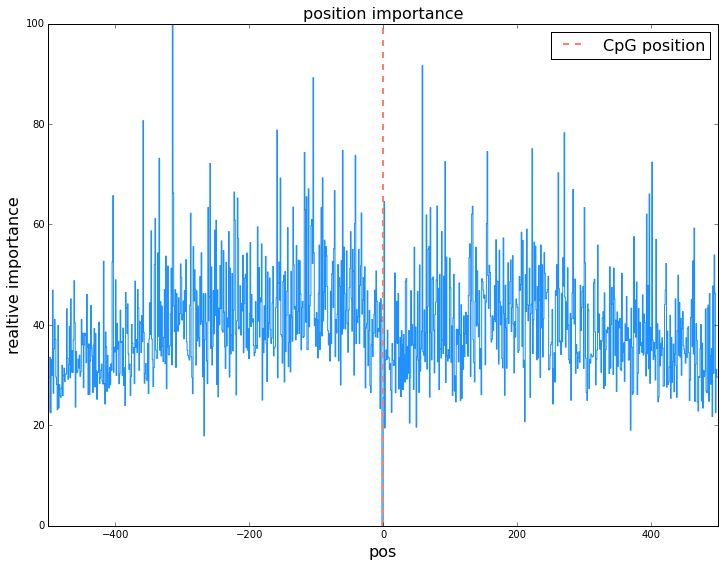

In [108]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Regulatory_Feature_Group=='Promoter_Associated')&
                (merged.Relation_to_UCSC_CpG_Island!='Island' ) ].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)

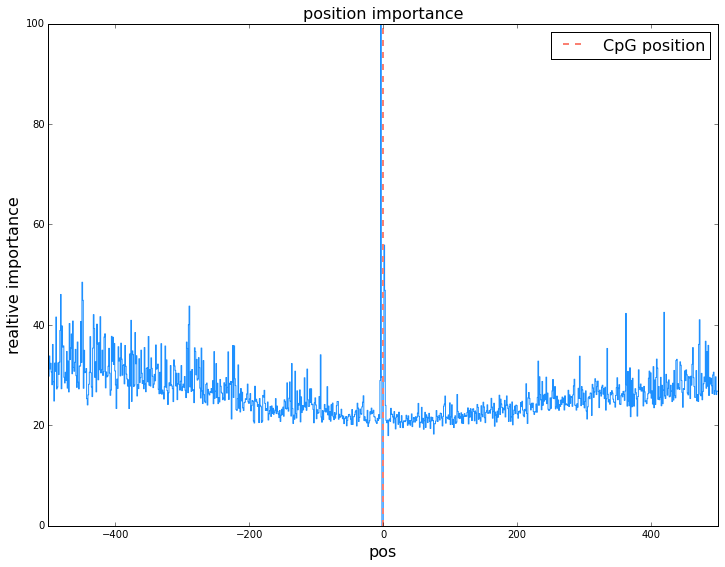

In [107]:
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Regulatory_Feature_Group==0)&
                (merged.Relation_to_UCSC_CpG_Island!='Island' ) ].index]=True

idx=cg_exl_idx & annot_idx
plot_feat_imp(train_x[idx],train_y[idx],n_estimators=1000,min_samples_split=100,n_jobs=14)